In [1]:
import pandas as pd
import numpy as np

In [2]:
enhancer1 = pd.read_csv('/Users/huajingru/Desktop/Fall 2024/capstone store/hpc_model_results/CD8-naive/model_results_cells_01_1.csv'
                        ,header=0, names=["gene", "enhancer1", "intercept", "beta.estimate", "beta.pvalue", "bootstrap.pvalue"])
enhancer2 = pd.read_csv('/Users/huajingru/Desktop/Fall 2024/capstone store/hpc_model_results/CD8-naive/model_results_cells_01_2.csv'
                        ,header=0,names=["gene", "enhancer2", "intercept", "beta.estimate", "beta.pvalue", "bootstrap.pvalue"])
interaction = pd.read_csv('/Users/huajingru/Desktop/Fall 2024/capstone store/hpc_model_results/CD8-naive/model_results_cells_00.csv'
                          ,header=0, names=["gene", "enhancers", "intercept", "beta.estimate", "beta.pvalue", "bootstrap.pvalue"])

In [3]:
enhancer1

,gene,enhancer1,intercept,beta.estimate,beta.pvalue,bootstrap.pvalue
0,TNFRSF1B,chr1-12177548-12178532,-10.706694,0.635897,0.004177,0.0132
1,PADI4,chr1-17281571-17282607,-10.422374,-12.638272,0.983669,0.0312
2,RPL11,chr1-23483354-23484969,-5.424192,0.005541,0.760763,0.8200
3,RPL11,chr1-23483354-23484969,-5.396097,0.056718,0.012694,0.1064
4,RPL11,chr1-23530563-23531556,-5.369669,-0.017693,0.476078,0.7800
...,...,...,...,...,...,...
2744,RPL10,chrX-154096425-154098209,-5.292721,0.017569,0.361660,0.5600
2745,RPL10,chrX-154096425-154098209,-5.277696,-0.031626,0.070371,0.2400
2746,RPL10,chrX-154411067-154412866,-5.271124,-0.048802,0.043844,0.3200
2747,RPL10,chrX-154411067-154412866,-5.284931,-0.033474,0.123849,0.3600


In [18]:
merged_df = pd.concat([enhancer1, enhancer2, interaction], axis=1, ignore_index=True)
merged_df = merged_df[[0,1,7, 2,3,4,5,8,9,10,11,14,15,16,17]]
merged_df.columns = ['gene', 'enhancer1', 'enhancer2', 'intercept_enhancer1', 'beta.estimate_enhancer1',
        'beta.pvalue_enhancer1',
       'bootstrap.pvalue_enhancer1','intercept_enhancer2', 'beta.estimate_enhancer2',
        'beta.pvalue_enhancer2',
       'bootstrap.pvalue_enhancer2','intercept_both', 'beta.estimate_both',  'beta.pvalue_both',
       'bootstrap.pvalue_both']
merged_df

,gene,enhancer1,enhancer2,intercept_enhancer1,beta.estimate_enhancer1,beta.pvalue_enhancer1,bootstrap.pvalue_enhancer1,intercept_enhancer2,beta.estimate_enhancer2,beta.pvalue_enhancer2,bootstrap.pvalue_enhancer2,intercept_both,beta.estimate_both,beta.pvalue_both,bootstrap.pvalue_both
0,TNFRSF1B,chr1-12177548-12178532,chr1-12617039-12618665,-10.706694,0.635897,0.004177,0.0132,-10.736166,0.299374,0.232033,0.3800,-11.558370,0.278171,0.036216,0.0520
1,PADI4,chr1-17281571-17282607,chr1-17307936-17308894,-10.422374,-12.638272,0.983669,0.0312,-10.422374,-12.279461,0.987477,0.2600,-10.418427,0.977661,0.006463,0.0004
2,RPL11,chr1-23483354-23484969,chr1-23530563-23531556,-5.424192,0.005541,0.760763,0.8200,-5.416130,-0.024988,0.266780,0.4200,-5.439925,-0.005488,0.652570,0.8200
3,RPL11,chr1-23483354-23484969,chr1-23553945-23555196,-5.396097,0.056718,0.012694,0.1064,-5.430033,0.009834,0.619060,0.7000,-5.431316,-0.009784,0.340488,0.4600
4,RPL11,chr1-23530563-23531556,chr1-23553945-23555196,-5.369669,-0.017693,0.476078,0.7800,-5.410140,-0.021856,0.219643,0.5600,-5.410410,-0.021906,0.058683,0.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,RPL10,chrX-154096425-154098209,chrX-154457428-154458962,-5.292721,0.017569,0.361660,0.5600,-5.341891,0.024885,0.308822,0.5400,-5.351887,-0.042515,0.000551,0.0588
2745,RPL10,chrX-154096425-154098209,chrX-154750320-154751610,-5.277696,-0.031626,0.070371,0.2400,-5.333131,-0.018992,0.557183,0.7800,-5.295131,0.003469,0.822471,1.0000
2746,RPL10,chrX-154411067-154412866,chrX-154457428-154458962,-5.271124,-0.048802,0.043844,0.3200,-5.222191,-0.058079,0.004123,0.1004,-5.255075,-0.004522,0.764379,0.7400
2747,RPL10,chrX-154411067-154412866,chrX-154750320-154751610,-5.284931,-0.033474,0.123849,0.3600,-5.233929,-0.009683,0.719516,0.8800,-5.246828,0.015352,0.418725,0.7200


In [19]:
significant = merged_df
#filter out based on pvalues
significant

,gene,enhancer1,enhancer2,intercept_enhancer1,beta.estimate_enhancer1,beta.pvalue_enhancer1,bootstrap.pvalue_enhancer1,intercept_enhancer2,beta.estimate_enhancer2,beta.pvalue_enhancer2,bootstrap.pvalue_enhancer2,intercept_both,beta.estimate_both,beta.pvalue_both,bootstrap.pvalue_both
0,TNFRSF1B,chr1-12177548-12178532,chr1-12617039-12618665,-10.706694,0.635897,0.004177,0.0132,-10.736166,0.299374,0.232033,0.3800,-11.558370,0.278171,0.036216,0.0520
1,PADI4,chr1-17281571-17282607,chr1-17307936-17308894,-10.422374,-12.638272,0.983669,0.0312,-10.422374,-12.279461,0.987477,0.2600,-10.418427,0.977661,0.006463,0.0004
2,RPL11,chr1-23483354-23484969,chr1-23530563-23531556,-5.424192,0.005541,0.760763,0.8200,-5.416130,-0.024988,0.266780,0.4200,-5.439925,-0.005488,0.652570,0.8200
3,RPL11,chr1-23483354-23484969,chr1-23553945-23555196,-5.396097,0.056718,0.012694,0.1064,-5.430033,0.009834,0.619060,0.7000,-5.431316,-0.009784,0.340488,0.4600
4,RPL11,chr1-23530563-23531556,chr1-23553945-23555196,-5.369669,-0.017693,0.476078,0.7800,-5.410140,-0.021856,0.219643,0.5600,-5.410410,-0.021906,0.058683,0.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,RPL10,chrX-154096425-154098209,chrX-154457428-154458962,-5.292721,0.017569,0.361660,0.5600,-5.341891,0.024885,0.308822,0.5400,-5.351887,-0.042515,0.000551,0.0588
2745,RPL10,chrX-154096425-154098209,chrX-154750320-154751610,-5.277696,-0.031626,0.070371,0.2400,-5.333131,-0.018992,0.557183,0.7800,-5.295131,0.003469,0.822471,1.0000
2746,RPL10,chrX-154411067-154412866,chrX-154457428-154458962,-5.271124,-0.048802,0.043844,0.3200,-5.222191,-0.058079,0.004123,0.1004,-5.255075,-0.004522,0.764379,0.7400
2747,RPL10,chrX-154411067-154412866,chrX-154750320-154751610,-5.284931,-0.033474,0.123849,0.3600,-5.233929,-0.009683,0.719516,0.8800,-5.246828,0.015352,0.418725,0.7200


In [26]:
betas = significant[['gene', 'enhancer1', 'enhancer2','beta.estimate_enhancer1','beta.estimate_enhancer2', 'beta.estimate_both']]
betas

,gene,enhancer1,enhancer2,beta.estimate_enhancer1,beta.estimate_enhancer2,beta.estimate_both
0,TNFRSF1B,chr1-12177548-12178532,chr1-12617039-12618665,0.635897,0.299374,0.278171
1,PADI4,chr1-17281571-17282607,chr1-17307936-17308894,-12.638272,-12.279461,0.977661
2,RPL11,chr1-23483354-23484969,chr1-23530563-23531556,0.005541,-0.024988,-0.005488
3,RPL11,chr1-23483354-23484969,chr1-23553945-23555196,0.056718,0.009834,-0.009784
4,RPL11,chr1-23530563-23531556,chr1-23553945-23555196,-0.017693,-0.021856,-0.021906
...,...,...,...,...,...,...
2744,RPL10,chrX-154096425-154098209,chrX-154457428-154458962,0.017569,0.024885,-0.042515
2745,RPL10,chrX-154096425-154098209,chrX-154750320-154751610,-0.031626,-0.018992,0.003469
2746,RPL10,chrX-154411067-154412866,chrX-154457428-154458962,-0.048802,-0.058079,-0.004522
2747,RPL10,chrX-154411067-154412866,chrX-154750320-154751610,-0.033474,-0.009683,0.015352


In [27]:
betas['opposite_sign_interaction'] = (
    ((betas['beta.estimate_enhancer1'] > 0) & (betas['beta.estimate_enhancer2'] > 0) & (betas['beta.estimate_both'] < 0)) |
    ((betas['beta.estimate_enhancer1'] < 0) & (betas['beta.estimate_enhancer2'] < 0) & (betas['beta.estimate_both'] > 0))
)

opposite_sign = betas[betas['opposite_sign_interaction']]
opposite_sign

/var/folders/hb/pn_3c51d1fj1n2jntgjrxmpm0000gn/T/ipykernel_67060/2482289220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betas['opposite_sign_interaction'] = (


,gene,enhancer1,enhancer2,beta.estimate_enhancer1,beta.estimate_enhancer2,beta.estimate_both,opposite_sign_interaction
1,PADI4,chr1-17281571-17282607,chr1-17307936-17308894,-12.638272,-12.279461,0.977661,True
3,RPL11,chr1-23483354-23484969,chr1-23553945-23555196,0.056718,0.009834,-0.009784,True
10,RCAN3,chr1-24415132-24416326,chr1-24964804-24965693,-0.108930,-0.026656,0.010797,True
18,RCAN3,chr1-24501323-24503397,chr1-24536005-24536921,-0.055534,-0.033113,0.030678,True
20,RCAN3,chr1-24501323-24503397,chr1-24928575-24930729,-0.036321,-0.010136,0.006260,True
...,...,...,...,...,...,...,...
2743,RPL10,chrX-154096425-154098209,chrX-154411067-154412866,-0.064714,-0.109518,0.009168,True
2744,RPL10,chrX-154096425-154098209,chrX-154457428-154458962,0.017569,0.024885,-0.042515,True
2745,RPL10,chrX-154096425-154098209,chrX-154750320-154751610,-0.031626,-0.018992,0.003469,True
2747,RPL10,chrX-154411067-154412866,chrX-154750320-154751610,-0.033474,-0.009683,0.015352,True


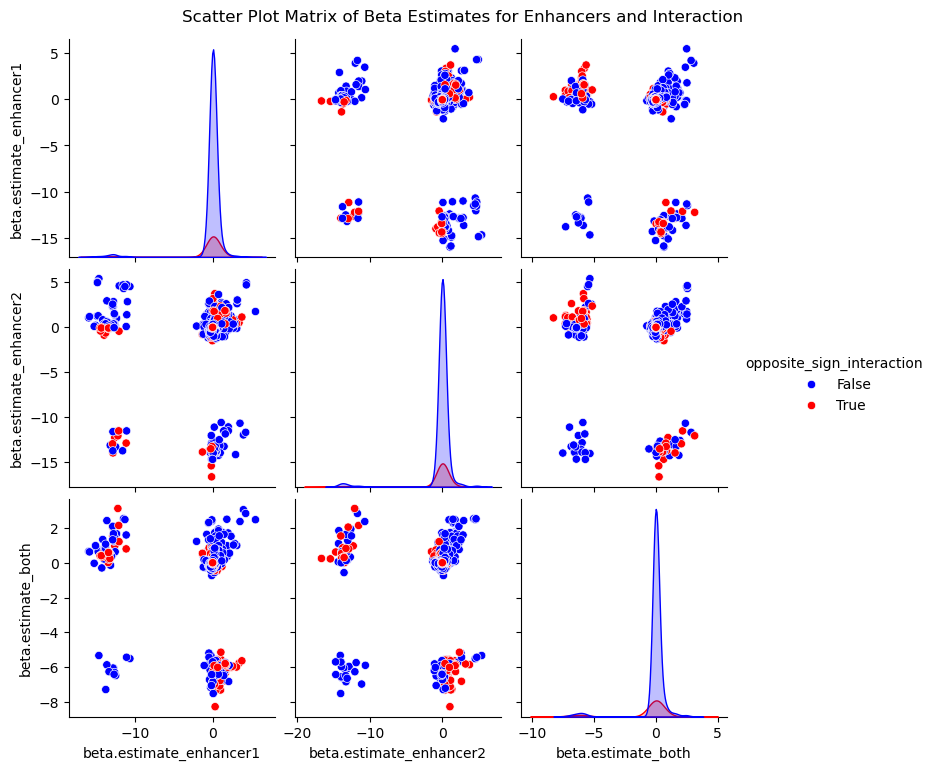

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pair plot of beta estimates
sns.pairplot(betas, vars=['beta.estimate_enhancer1', 'beta.estimate_enhancer2', 'beta.estimate_both'], 
             hue='opposite_sign_interaction', palette={True: 'red', False: 'blue'})
plt.suptitle("Scatter Plot Matrix of Beta Estimates for Enhancers and Interaction", y=1.02)
plt.show()

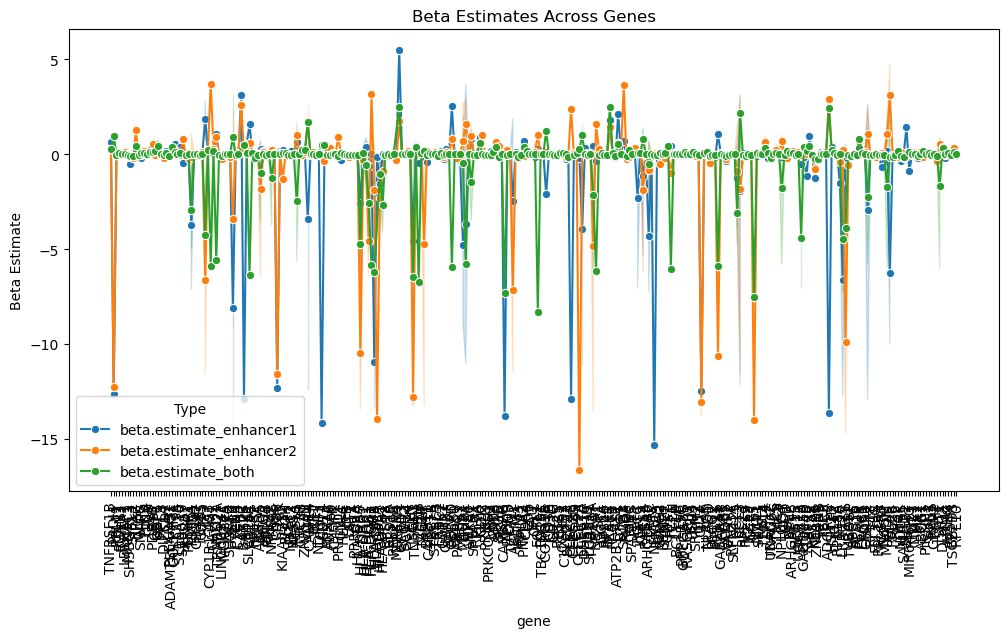

In [29]:
# Melt data for line plot
line_plot_df = betas.melt(id_vars='gene', value_vars=['beta.estimate_enhancer1', 'beta.estimate_enhancer2', 'beta.estimate_both'], 
                       var_name='Type', value_name='Beta Estimate')

# Line plot for each gene
plt.figure(figsize=(12, 6))
sns.lineplot(x='gene', y='Beta Estimate', hue='Type', data=line_plot_df, marker='o')
plt.xticks(rotation=90)
plt.title("Beta Estimates Across Genes")
plt.show()